<a href="https://www.kaggle.com/code/mukoubuchi/dataviz-badging-practical-examination?scriptVersionId=171018577" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Preparation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_rows', 1024)
pd.set_option('display.max_columns', 1024)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa19csv/fifa19.csv


# Assignment 1

In [2]:
file_path = '/kaggle/input/fifa19csv/fifa19.csv'

# Reading the CSV file into a DataFrame using Pandas
df = pd.read_csv(file_path)

df = df.fillna(0).astype('int', errors='ignore')

# Displaying the first few rows of the DataFrame to check the data
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",0,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5,4,5,High/ Low,C. Ronaldo,Yes,ST,7,"Jul 10, 2018",0,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5,5,5,High/ Medium,Neymar,Yes,LW,10,"Aug 3, 2017",0,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4,3,1,Medium/ Medium,Lean,Yes,GK,1,"Jul 1, 2011",0,2020,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4,5,4,High/ High,Normal,Yes,RCM,7,"Aug 30, 2015",0,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,€196.4M


# Assignment 2

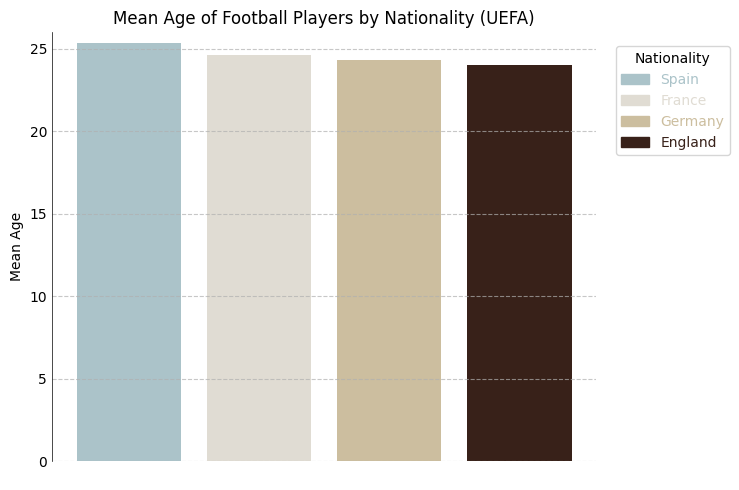

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as mpatches

df_tmp = df.groupby('Nationality')['Age'].mean().reset_index()
df_tmp = df_tmp.query('Nationality in ["England", "France", "Spain", "Germany"]')
df_tmp = df_tmp.sort_values('Age', ascending=False)

# Plot
colors = ['#ABC3C9', '#E0DCD3', '#CCBE9F', '#382119']
plt.figure(figsize=(7.5, 5))
bars = plt.bar(df_tmp['Nationality'],
               df_tmp['Age'],
               color=[_ for _ in colors],
               width=0.8)
plt.title('Mean Age of Football Players by Nationality (UEFA)')
plt.ylabel('Mean Age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 26)
plt.yticks(np.arange(0, 30, 5))
plt.xticks(color="None")
plt.tick_params(axis='x', length=0)  # Remove x-axis ticks
plt.tick_params(axis='y', length=0)  # Remove y-axis ticks
plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border
plt.gca().spines['left'].set_linewidth(0.5)  # Set left border linewidth to 0.5
plt.gca().spines['bottom'].set_visible(False)  # Remove bottom border

# Create legend handles and labels
legend_handles = [mpatches.Patch(color=color, label=label)
                  for color, label in zip([_ for _ in colors],
                                          [_ for _ in df_tmp['Nationality']])]
plt.legend(labelcolor='linecolor',
           handles=legend_handles,
           title='Nationality',
           bbox_to_anchor=(1.01, 1),
           loc='upper left',
           borderaxespad=1)

# Show plot
plt.tight_layout()
plt.show()

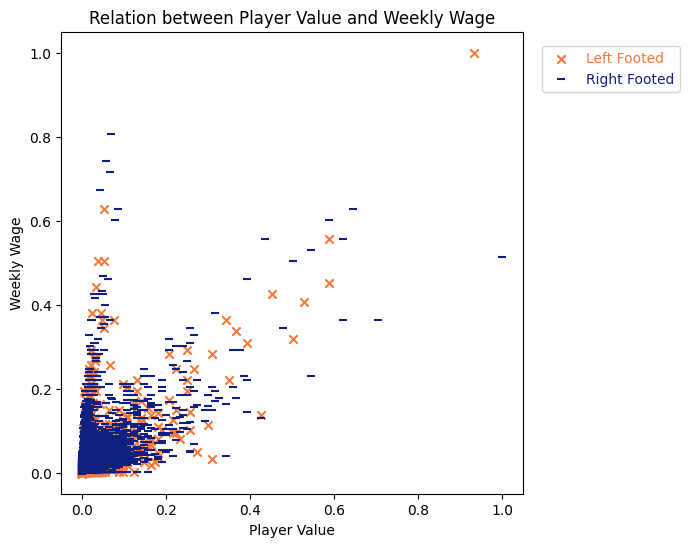

In [4]:
from sklearn.preprocessing import MinMaxScaler

df_tmp = df.copy()

# Data preprocessing
df_tmp['Value'] = df['Value'].replace({'€': '', 'M': '000000', 'K': '000', '\.': ''}, regex=True)
df_tmp['Wage'] = df['Wage'].replace({'€': '', 'M': '000000', 'K': '000', '\.': ''}, regex=True)

# Normalization
minmax_sc = MinMaxScaler()
X = df_tmp.loc[:, 'Value':'Wage']
X = minmax_sc.fit_transform(X)

df_tmp.loc[:, 'Value':'Wage'] = X

# Scatter plot
fig, ax = plt.subplots(figsize=(6,6))

left_footed = df_tmp[df_tmp['Preferred Foot'] == 'Left']
right_footed = df_tmp[df_tmp['Preferred Foot'] == 'Right']

ax.scatter(left_footed['Value'], left_footed['Wage'], color='#F5793A', label='Left Footed', marker='x')
ax.scatter(right_footed['Value'], right_footed['Wage'], color='#0F2080', label='Right Footed', marker='_')

plt.title('Relation between Player Value and Weekly Wage')

# Legend and axis labels
plt.xlabel('Player Value')
plt.ylabel('Weekly Wage')
plt.legend(labelcolor='linecolor', bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=1)

# Arrange aspect ratio
def forceAspect(ax,aspect=1):
    #aspect is width/height
    scale_str = ax.get_yaxis().get_scale()
    xmin,xmax = ax.get_xlim()
    ymin,ymax = ax.get_ylim()
    if scale_str=='linear':
        asp = abs((xmax-xmin)/(ymax-ymin))/aspect
    elif scale_str=='log':
        asp = abs((scipy.log(xmax)-scipy.log(xmin))/(scipy.log(ymax)-scipy.log(ymin)))/aspect
    ax.set_aspect(asp)

forceAspect(ax)
    

# Show plot
plt.show()

# Assignment 3

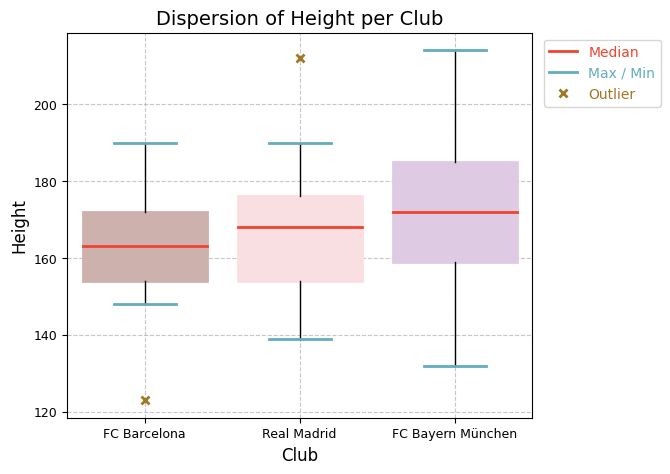

In [5]:
import seaborn as sns

df_tmp = df[['Club', 'Weight', 'Height']]
df_tmp = df_tmp.query('Club in ["FC Barcelona", "Real Madrid", "FC Bayern München"]')
df_tmp = df_tmp.dropna(subset=['Club', 'Weight', 'Height']).reset_index(drop=True)

# Data wrangling
# Remove 'lbs' suffix from the Weight column and convert to numeric
df_tmp['Weight'] = df_tmp['Weight'].str.replace('lbs', '').astype(int)

# Convert height from feet and inches to inches
df_tmp['Height'] = df_tmp['Height'].apply(lambda x: int(x.split('\'')[0]) * 12 + int(x.split('\'')[1]))

# Making data per team
df_bar_w = df_tmp.query('Club in ["FC Barcelona"]')['Weight']
df_rea_w = df_tmp.query('Club in ["Real Madrid"]')['Weight']
df_bay_w = df_tmp.query('Club in ["FC Bayern München"]')['Weight']
df_bar_h = df_tmp.query('Club in ["FC Barcelona"]')['Height']

# Define colors
bxcolor = ['#CDB1AD', '#FADFE2', '#DECBE3']
lncolor = ['#EE442F', '#63ACBE', '#A17724']

# Create boxplots
plt.figure(figsize=(6, 5))
bp = plt.boxplot([df_bar_w, df_rea_w, df_bay_w],
            labels=['FC Barcelona', 'Real Madrid', 'FC Bayern München'],
            widths=(0.8, 0.8, 0.8),
            patch_artist=True,
            flierprops=dict(marker='x', markeredgecolor=lncolor[2], markeredgewidth=2)
           )

# Set box colors
for b, c in zip(bp['boxes'], bxcolor):
    b.set(color=c, linewidth=2) # outline
    b.set_facecolor(c) # body

# Set line colors
[b.set(color=lncolor[0], linewidth=2) for b in bp['medians']]
[b.set(color=lncolor[1], linewidth=2) for b in bp['caps']]
[b.set(color=lncolor[2], linewidth=2) for b in bp['fliers']]

lines = [bp['medians'][0], bp['caps'][0], bp['fliers'][0]]

# Create legend
legend_labels = ['Median', 'Max / Min', 'Outlier']
plt.legend(lines, legend_labels, labelcolor='markeredgecolor', bbox_to_anchor=(1.01, 1), loc='upper left')

# Add grid and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Dispersion of Height per Club', fontsize=14)
plt.xlabel('Club', fontsize=12)
plt.ylabel('Height', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

# Assignment 4

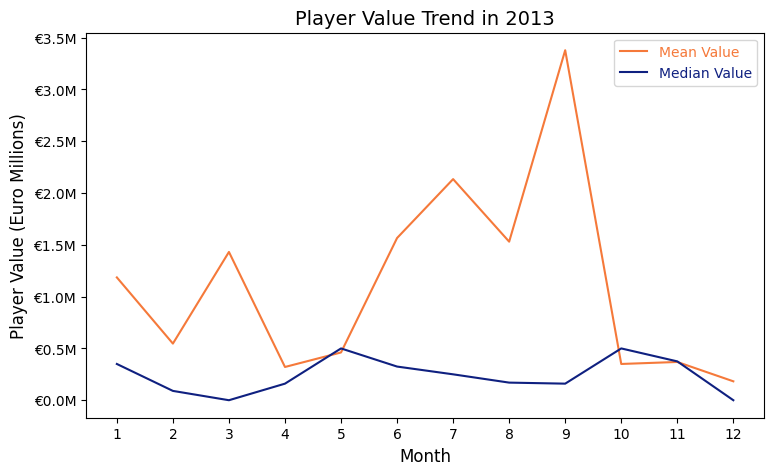

In [6]:
import warnings
warnings.filterwarnings('ignore')

player_data = df[['Value', 'Joined']]
player_data['Value'] = player_data['Value'].replace({'€': '', 'M': '000000', 'K': '000'}, regex=True)

# Convert Signing_Date to datetime format
player_data['Joined'] = pd.to_datetime(player_data['Joined'], format='%b %d, %Y', errors='coerce')

# Filter data for the year 2013
player_data_2013 = player_data[player_data['Joined'].dt.year == 2013]

# Calculate mean and median player values for each month
player_data_2013['Month'] = player_data_2013['Joined'].dt.month
player_data_2013['Value'] = player_data_2013['Value'].astype(float)
monthly_stats = player_data_2013.groupby('Month')['Value'].agg(['mean', 'median'])

# arrange ylabel
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'€{x*1e-6:1.1f}M'
fig, ax = plt.subplots(figsize=(8.75, 5))
ax.yaxis.set_major_formatter(millions)

# arrange xlabel
from matplotlib.ticker import MaxNLocator,MultipleLocator,AutoMinorLocator
ax.xaxis.set_major_locator(MultipleLocator(1))

# Plot the Time Series (line) plot
plt.plot(monthly_stats.index, monthly_stats['mean'], label='Mean Value', color='#F5793A')
plt.plot(monthly_stats.index, monthly_stats['median'], label='Median Value', color='#0F2080')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Player Value (Euro Millions)', fontsize=12)
plt.title('Player Value Trend in 2013', fontsize=14)
plt.legend(labelcolor='linecolor')
plt.show()